In [15]:
#!/usr/bin/env python
# coding: utf-8

# In[3]:


import csv
import random
data= list()
with open('redditSubmissions.csv', encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row)


# In[8]:

random.shuffle(data)
half = len(data)/2
# print(half)
trainData = data[:int(half)]
testData = data[int(half):]

import numpy as np
import scipy.optimize
import random
from collections import defaultdict
import numpy
import urllib
import scipy.optimize
import random
from sklearn import svm

import time
import re
from collections import defaultdict
ratingPerHour = defaultdict(int)
timeCounter = defaultdict(int)

def returnRating(upvotes, totVotes):
    if totVotes is None: return 0
    if(int(totVotes)==0):
        return 0
    return int(upvotes)/int(totVotes)

def convertToHour(dateT):
    ISOtime = re.sub('......$', '', dateT)
    while(len(ISOtime)>19):
        ISOtime = re.sub('.$', '', ISOtime)
    timeStruct= time.strptime(ISOtime, "%Y-%m-%dT%H:%M:%S")
    return timeStruct[3]

for d in trainData: 
    ratingMetric = returnRating(d['number_of_upvotes'],d['total_votes'])
    dateTime = d['rawtime']
    if(dateTime):
        hour = convertToHour(dateTime)
        ratingPerHour[hour]+= int(ratingMetric)
        timeCounter[hour]+=1
        

        
avgRating = list()
for (hour,tot) in ratingPerHour.items():
    avgRating.append((hour,tot/timeCounter[hour]))
    
sortedTimeRating = sorted(avgRating, key=lambda tup: tup[1])
sortedTimeRating.reverse

print("Top average hour ratings:")
for i in range(0,len(sortedTimeRating)):
    h =sortedTimeRating[i][0]
    avgR=sortedTimeRating[i][1]
    print(str(i)+".) At time " +str(h) + "h average Rating is "+str(avgR))

Top average hour ratings:
0.) At time 12h average Rating is 0.008011145942180425
1.) At time 9h average Rating is 0.010604870384917517
2.) At time 6h average Rating is 0.010672853828306265
3.) At time 11h average Rating is 0.01088101088101088
4.) At time 7h average Rating is 0.01103097157403479
5.) At time 5h average Rating is 0.011178861788617886
6.) At time 1h average Rating is 0.011428571428571429
7.) At time 14h average Rating is 0.01155527795128045
8.) At time 10h average Rating is 0.011860637509266123
9.) At time 8h average Rating is 0.011875511875511875
10.) At time 13h average Rating is 0.012520593080724876
11.) At time 18h average Rating is 0.012658227848101266
12.) At time 19h average Rating is 0.013285358427899253
13.) At time 15h average Rating is 0.013569321533923304
14.) At time 20h average Rating is 0.013970382788488405
15.) At time 17h average Rating is 0.01417413942724906
16.) At time 23h average Rating is 0.014264264264264264
17.) At time 16h average Rating is 0.01546

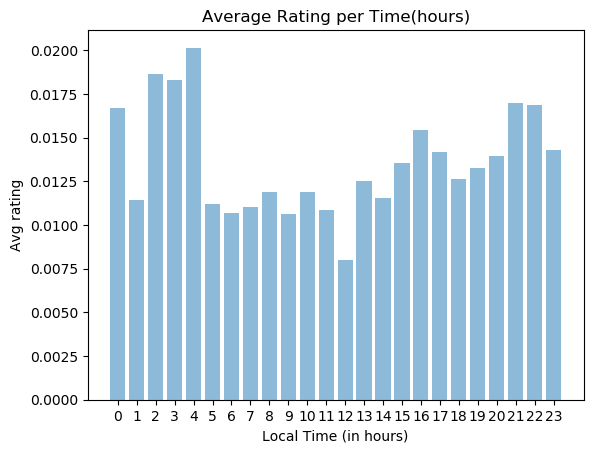

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

sortedTime = sorted(avgRating, key=lambda tup: tup[0])

objects = [ k for (k,v) in sortedTime]
y_pos = np.arange(len(objects))
performance = [ v for (k,v) in sortedTime]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Local Time (in hours)')
plt.ylabel('Avg rating')
plt.title('Average Rating per Time(hours)')
 
plt.show()